In [1]:
import librosa
import os 
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


/home/vipin/.local/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
DATA_DIR = './cats_dogs/train'
CATEGORIES = os.listdir(DATA_DIR)
print(CATEGORIES)
sr = 22050

['dog', 'cat']


In [3]:
data = []
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
        try:
            x,sr = librosa.load(os.path.join(path,audio), sr=sr)
            data.append([x,class_num])
        except Exception as E:
            pass

In [4]:
np.shape(data)

(210, 2)

In [5]:
167 + 111

278

In [6]:
X = []
Y = []
for feature,label in data:
    X.append(feature)
    Y.append(label)


In [7]:
np.shape(X)

(210,)

In [8]:
np.shape(Y)

(210,)

In [9]:
val = np.random.randint(0, len(Y), 12)
for value in val:
    print(CATEGORIES[Y[value]])
    ipd.display(ipd.Audio(X[value], rate=sr))
    

dog


cat


dog


dog


cat


cat


cat


cat


dog


dog


cat


cat


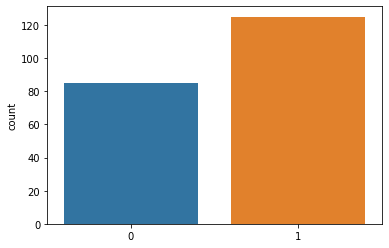

In [10]:
import seaborn as sns
sns.countplot(Y)
plt.show()

In [11]:
DATA_DIR = './cats_dogs/test'
CATEGORIES = os.listdir(DATA_DIR)
sr = 22050
data_test = []
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
        try:
            x,sr = librosa.load(os.path.join(path,audio), sr=sr)
            data_test.append([x,class_num])
        except Exception as E:
            pass

In [12]:
np.shape(data_test)

(67, 2)

In [13]:
X_test = []
Y_test = []
for feature,label in data_test:
    X_test.append(feature)
    Y_test.append(label)


In [14]:
np.shape(X_test)

(67,)

In [21]:
np.shape(X[0])

()

cats


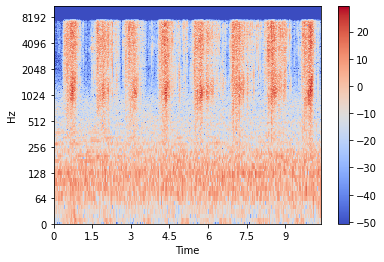

In [25]:
import librosa.display
x = librosa.stft(X[0])
print(CATEGORIES[Y[0]])
Xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

dogs


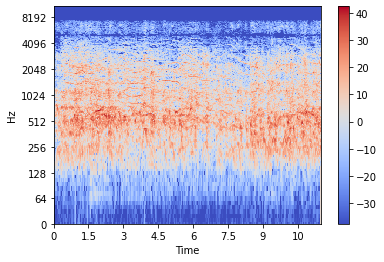

In [26]:
import librosa.display
x = librosa.stft(X[200])
print(CATEGORIES[Y[200]])
Xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

dogs


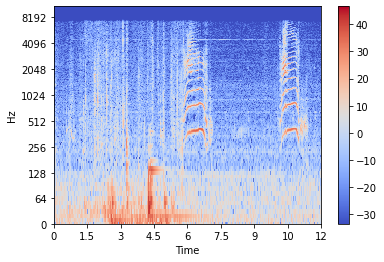

In [28]:
import librosa.display
index = 209
x = librosa.stft(X[index])
print(CATEGORIES[Y[index]])
Xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

cats


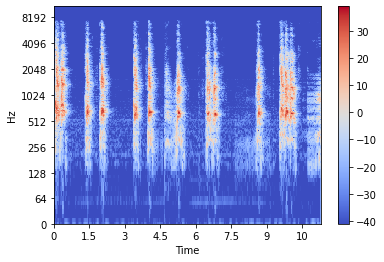

In [29]:
import librosa.display
index = 9
x = librosa.stft(X[index])
print(CATEGORIES[Y[index]])
Xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

dogs


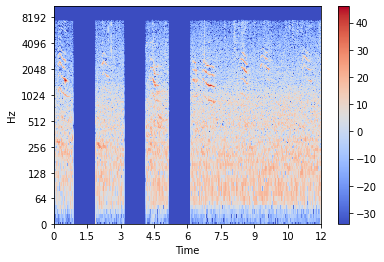

In [30]:
import librosa.display
index = 110
x = librosa.stft(X[index])
print(CATEGORIES[Y[index]])
Xdb = librosa.amplitude_to_db(abs(x))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,random_state=0)
clf.fit(X,Y)